In [ ]:
# Importing the libraries
import pandas as pd

# Loading the dataset
data_set = pd.read_csv("Life_expectancy_Data.csv")
print(f"The first five rows are:\n{data_set.head()}")

# Initial dataset information before cleaning
print(f"The information before cleaning:\n{data_set.info()}")

# Checking for empty slots
print(f"Empty slots:\n{data_set.isnull().sum()}")
print(f"Duplicate rows:\n{data_set.duplicated()}")

# Cleaning the column names to remove whitespaces
data_set.columns = data_set.columns.str.strip().str.replace(' ', '_', regex=True).str.replace("-", "_", regex=True)   
print("The columns have been cleaned to remove whitespaces and replace spaces with underscores.")

# Dataset information after cleaning
print("Dataset information after cleaning")
data_set.info()

# Descriptive information after cleaning
print("Descriptive summary of the dataset after cleaning")
display(data_set.describe())

#Saving the cleaned data to a new csv file
data_set.to_csv("cleaned_life_expectancy_data.csv", index=False)
print("\nCleaned data saved to 'cleaned_life_expectancy_data.csv'")

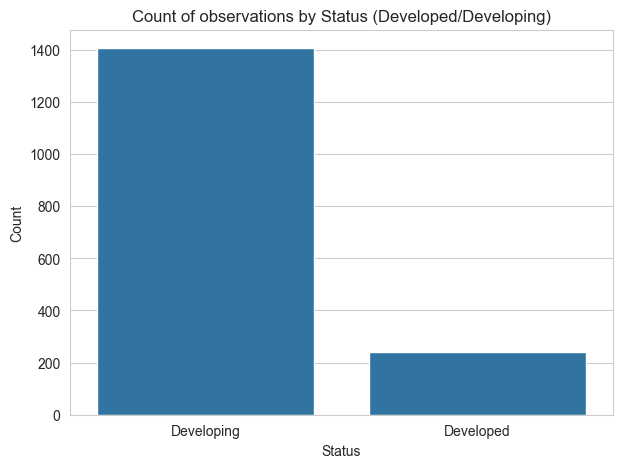

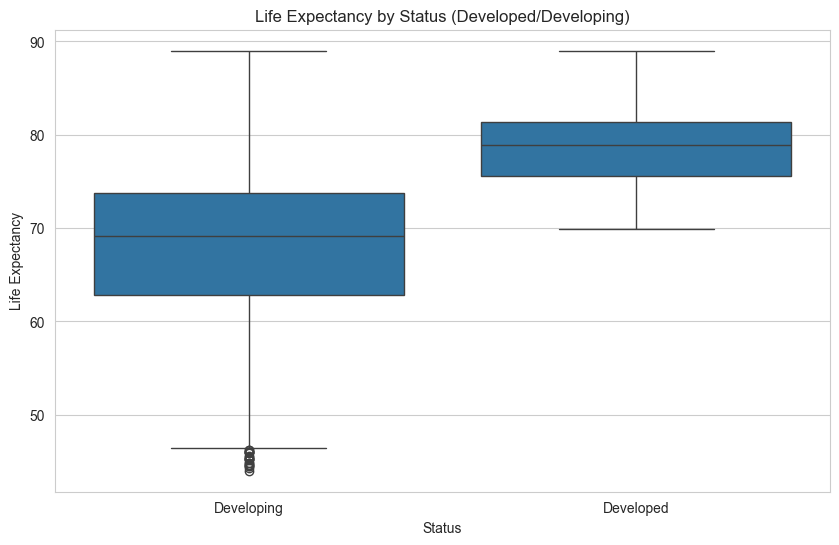

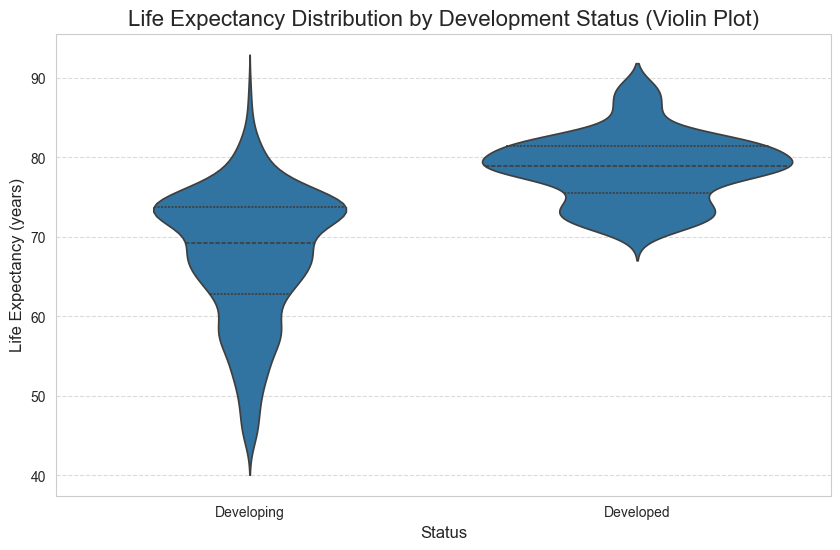

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the cleaned dataset
new_data_set = pd.read_csv("cleaned_life_expectancy_data.csv")

# Set the aesthetic style of the plots
sns.set_style(style="whitegrid")

# Distribution of 'status'
plt.figure(figsize=(7, 5))
sns.countplot(x='Status', data=new_data_set)
plt.title("Count of observations by Status (Developed/Developing)")
plt.xlabel("Status")
plt.ylabel("Count")
plt.savefig("status_distribution.png")
plt.show()

# Life Expectancy vs Status
plt.figure(figsize=(10, 6))
sns.boxplot(x='Status', y='Life_expectancy', data=new_data_set)
plt.title("Life Expectancy by Status (Developed/Developing)")
plt.xlabel("Status")
plt.ylabel("Life Expectancy")
plt.savefig("life_expectancy_by_status.png")
plt.show()

# Visualize the distribution of Life Expectancy by Status using violin plots
plt.figure(figsize=(10, 6))
sns.violinplot(x='Status', y='Life_expectancy', data=new_data_set, inner='quartile')
plt.title('Life Expectancy Distribution by Development Status (Violin Plot)', fontsize=16)
plt.xlabel('Status', fontsize=12)
plt.ylabel('Life Expectancy (years)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('life_expectancy_by_status_violinplot.png')
plt.show()




Exploratory Data Analysis (EDA) showing distributions and relationships within the dataset.

Bivariate Analysis:


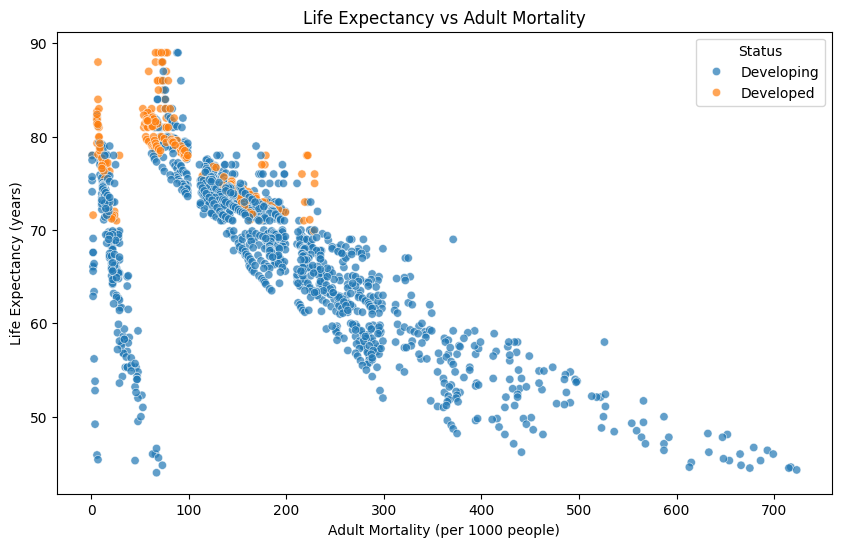

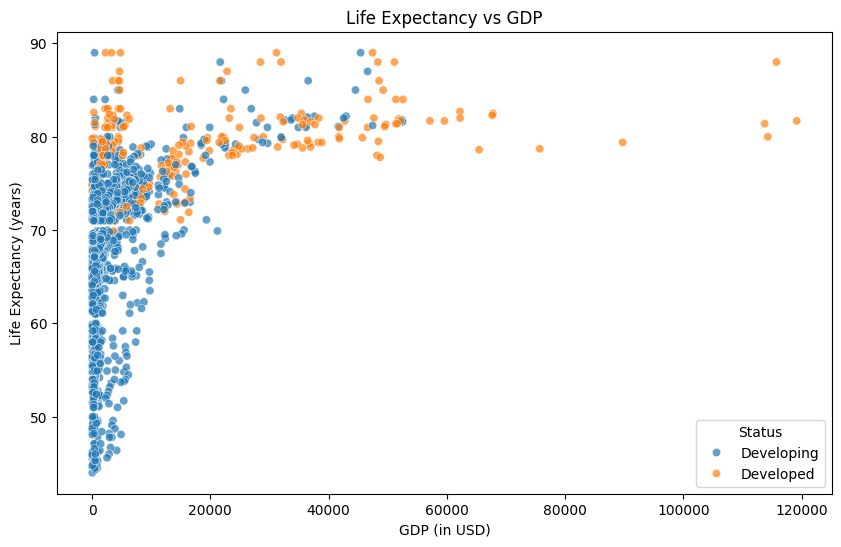

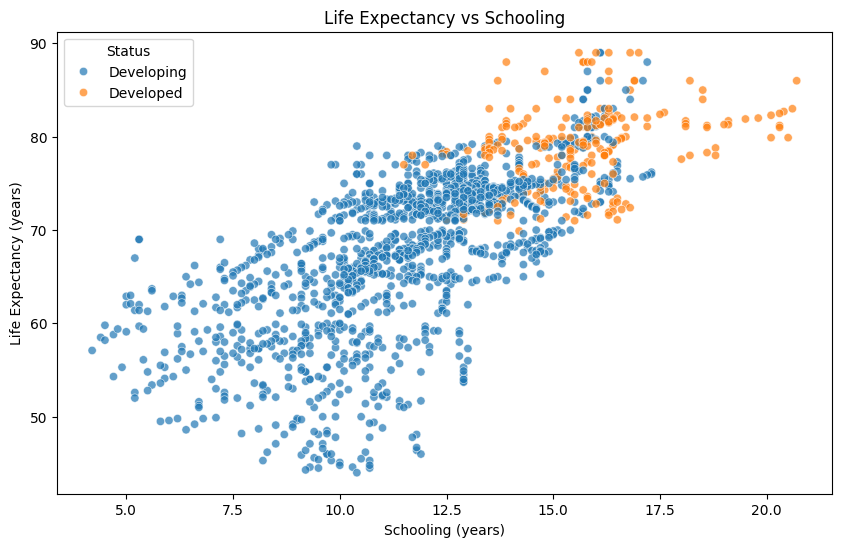

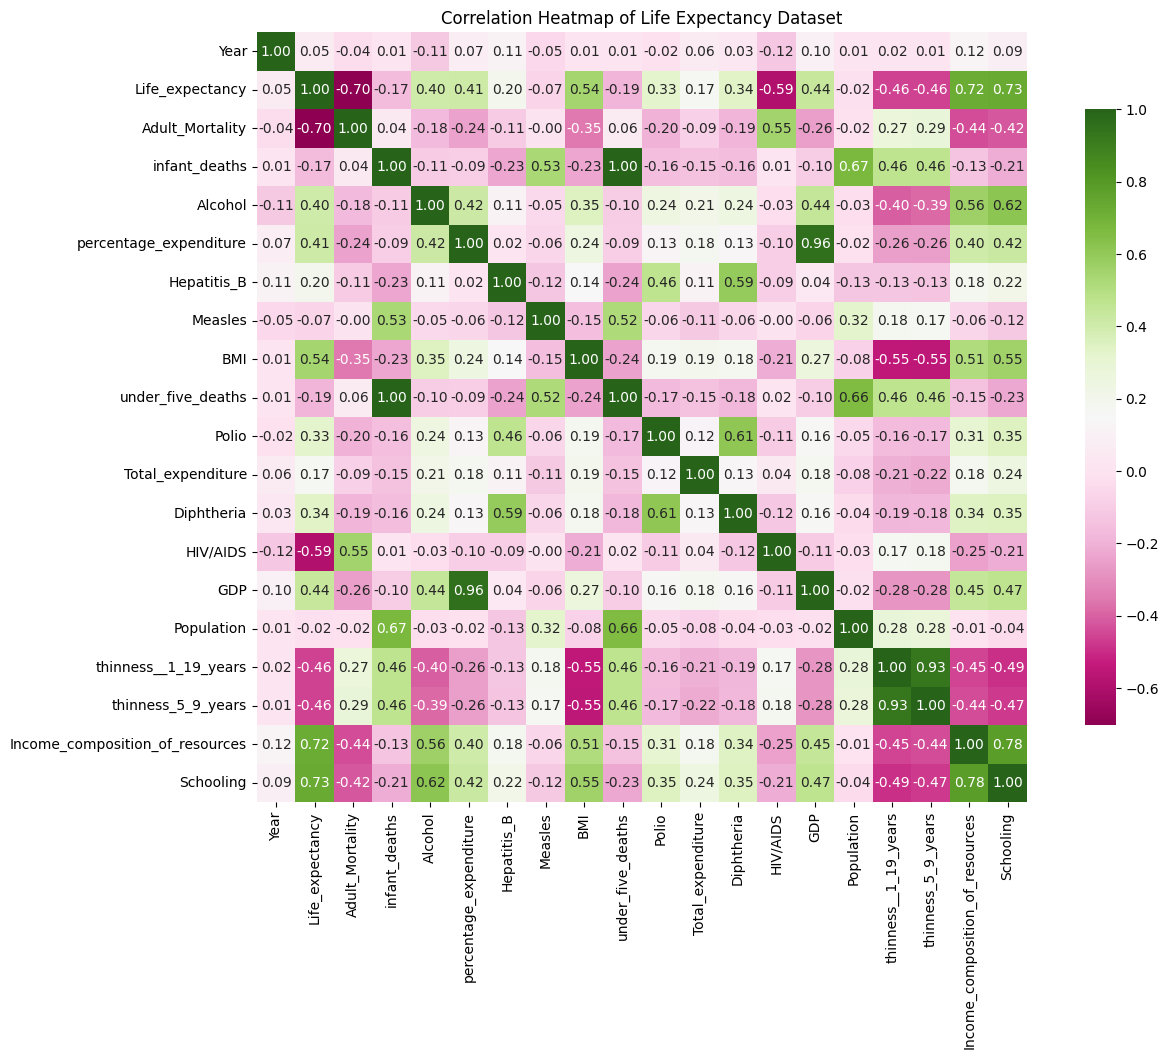

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the cleaned dataset
new_data_set = pd.read_csv("cleaned_life_expectancy_data.csv")

# Exploratory Data Analysis (EDA)
print("\nExploratory Data Analysis (EDA) showing distributions and relationships within the dataset.")
print("\nBivariate Analysis:")

# Life Expectancy vs Adult_Mortality
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Adult_Mortality', y='Life_expectancy', hue='Status', data=new_data_set, alpha=0.7)
plt.title("Life Expectancy vs Adult Mortality")
plt.xlabel("Adult Mortality (per 1000 people)")
plt.ylabel("Life Expectancy (years)")
plt.savefig("life_expectancy_vs_adult_mortality.png")
plt.show()

# Life Expectancy vs GDP
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GDP', y='Life_expectancy', hue='Status', data=new_data_set, alpha=0.7)
plt.title("Life Expectancy vs GDP")
plt.xlabel("GDP (in USD)")
plt.ylabel("Life Expectancy (years)")
plt.savefig("life_expectancy_vs_gdp.png")
plt.show()

# Life Expectancy vs Schooling
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Schooling', y='Life_expectancy', hue='Status', data=new_data_set, alpha=0.7)
plt.title("Life Expectancy vs Schooling")
plt.xlabel("Schooling (years)")
plt.ylabel("Life Expectancy (years)")
plt.savefig("life_expectancy_vs_schooling.png")
plt.show()

# Correlation heatmap
plt.figure(figsize=(15, 10)) 
correlation_matrix = new_data_set.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='PiYG', square=True, cbar_kws={"shrink": .8})
plt.title("Correlation Heatmap of Life Expectancy Dataset")
plt.savefig("correlation_heatmap.png")
plt.show()

       Country  Year      Status  Life_expectancy  Adult_Mortality  \
0  Afghanistan  2015  Developing             65.0              263   
1  Afghanistan  2014  Developing             59.9              271   
2  Afghanistan  2013  Developing             59.9              268   
3  Afghanistan  2012  Developing             59.5              272   
4  Afghanistan  2011  Developing             59.2              275   

   infant_deaths  Alcohol  percentage_expenditure  Hepatitis_B  Measles  ...  \
0             62     0.01               71.279624           65     1154  ...   
1             64     0.01               73.523582           62      492  ...   
2             66     0.01               73.219243           64      430  ...   
3             69     0.01               78.184215           67     2787  ...   
4             71     0.01                7.097109           68     3013  ...   

   Polio  Total_expenditure  Diphtheria  HIV/AIDS         GDP  Population  \
0      6             

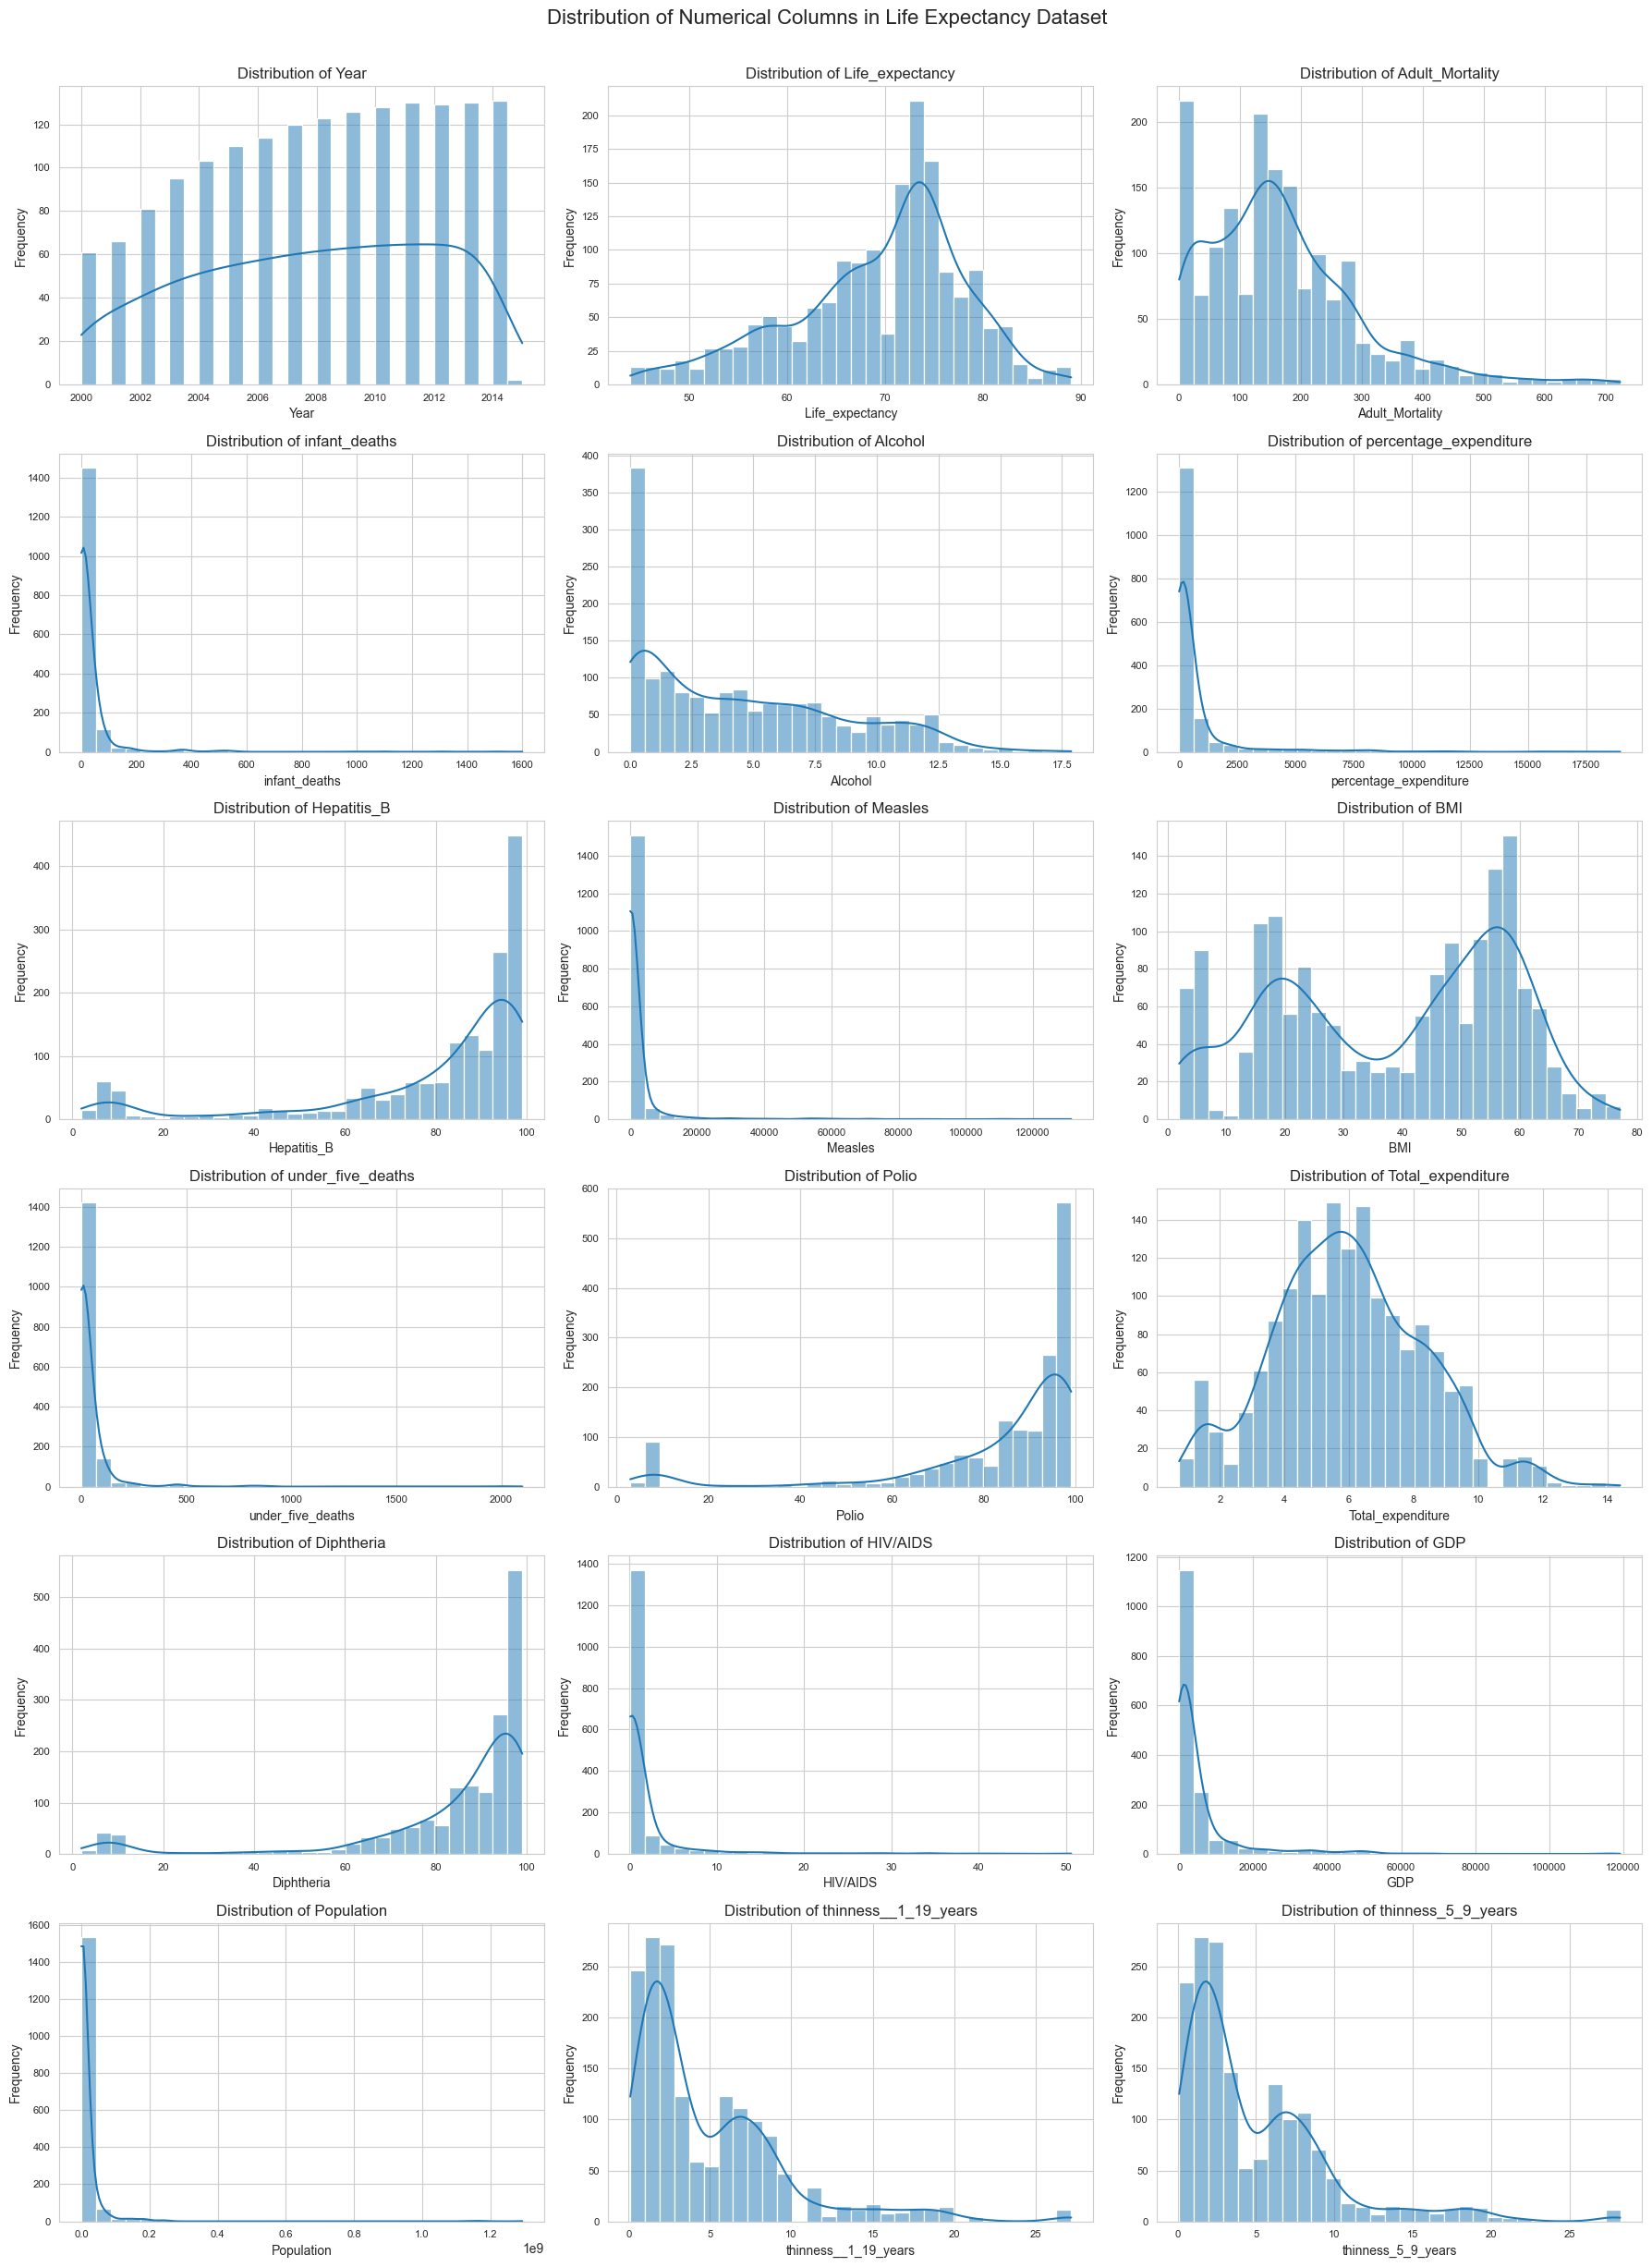

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset
new_data_set = pd.read_csv("cleaned_life_expectancy_data.csv")
print(new_data_set.head())

# Numerical columns in the dataset
numeric_cols = new_data_set.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Visualizing the distribution of life expectancy
# Set the style of seaborn for the plots

sns.set_style(style="whitegrid")

# Creating the histograms for the numerical columns
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(18, 24))
axes = axes.flatten() # Flatten the axes array for easy iteration

for i, col in enumerate(numeric_cols[:len(axes)]):
    sns.histplot(new_data_set[col], kde=True, ax=axes[i], bins=30)
    axes[i].set_title(f"Distribution of {col}", fontsize=12)
    axes[i].set_xlabel(col, fontsize=10)
    axes[i].set_ylabel("Frequency", fontsize=10)
    axes[i].tick_params(axis='both', which='major', labelsize=8)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle("Distribution of Numerical Columns in Life Expectancy Dataset", y=1.02, fontsize=16,)
plt.savefig("life_expectancy_distribution.png", dpi=300)
plt.show()